In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import random
import math

In [37]:
#Read preprocessed dataframe
df = pd.read_csv("dummy_csv.csv")
X = df.to_numpy()

In [23]:
#Number of clusters, number of iterations and early stopping need to be specified beforehand. 
#Number of clusters k 
k  = 3

#Number if iterations till convergence n_iter
n_iter = 100

In [24]:
#Initialize k random centroides. Centroids can not be inizialized on the same point.
def inizialize_centroids(X, k):
    centroids=[]
    temp = []
    i = 0
    while i < k:
        rand = random.randrange(0,X.shape[0]-1)
        if rand in temp:
            continue
        else:        
            print(f"Points chosen for cluster initialization {rand}")
            temp.append(rand)
            centroids.append(X[rand])
            i = i+1
    return centroids

In [25]:
def assign_cluster(X, centroids, k):
    # Create list of points which are appointed to each cluster
    clusters = [[] for _ in range(k)]

    # Loop through all instances and determine the closest cluster
    for i, j in enumerate(X):
        closest_centroid = np.argmin(np.sqrt(np.sum((j - centroids) ** 2, axis=1)))
        clusters[closest_centroid].append(i)

    return clusters

In [26]:
def determine_new_centroids(k, clusters, X):
    centroids = np.zeros((k, X.shape[1]))

    for i, j in enumerate(clusters):
        new_centroid = np.mean(X[j], axis=0)
        centroids[i] = new_centroid
    return centroids

In [27]:
def predict_cluster(clusters, X):
    y_pred = np.zeros(X.shape[0])

    for i, j in enumerate(clusters):
        for k in j:
            y_pred[k] = i

    return y_pred

In [32]:
def plot_fig(X, y_pred, centroids):
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=30, cmap=plt.cm.RdYlGn)
    plt.scatter(centroids[:, 0], centroids[:,1], s=250, marker='*', c='red', edgecolor='black')
    plt.show()

Points chosen for cluster initialization 173
Points chosen for cluster initialization 105
Points chosen for cluster initialization 38
Current iteration 0
Current iteration 1
Current iteration 2
Current iteration 3
Current iteration 4
Current iteration 5
Current iteration 6
Current iteration 7
Current iteration 8
Termination criterion satisfied in iteration 8


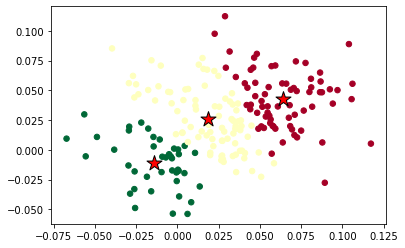

In [38]:
centroids = inizialize_centroids(X, k)

for i in range(n_iter):
    print(f"Current iteration {i}")
    clusters = assign_cluster(X, centroids, k)
    prev_centroids = centroids
    centroids = determine_new_centroids(k, clusters, X)

    diff = centroids - prev_centroids
    
    if not diff.any():
        print(f"Termination criterion satisfied in iteration {i}")
        break

# Get label predictions
y_pred = predict_cluster(clusters, X)


plot_fig(X, y_pred, centroids)